In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(160, 160, 3)  # smaller size
)

base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

2026-02-23 23:15:18.719340: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 23:15:19.370041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 23:15:19.373277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-23 23:15:21.635234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[0][0]']        

In [2]:
# Load images with label from directory

from tensorflow.keras.utils import image_dataset_from_directory

seed = 42
train_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/train',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)

val_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/validation',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)



Found 19051 files belonging to 4 classes.
Found 4780 files belonging to 4 classes.


In [3]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf

train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))
# test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

In [4]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10


2026-02-23 23:15:33.951193: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2026-02-23 23:15:34.031959: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2026-02-23 23:15:34.068999: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26214400 exceeds 10% of free system memory.
2026-02-23 23:15:34.096146: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78643200 exceeds 10% of free system memory.
2026-02-23 23:15:34.122543: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 80621568 exceeds 10% of free system memory.


596/596 [==============================] - 308s 511ms/step - loss: 0.7803 - accuracy: 0.6642 - val_loss: 0.5712 - val_accuracy: 0.7772
Epoch 2/10
596/596 [==============================] - 311s 522ms/step - loss: 0.5521 - accuracy: 0.7672 - val_loss: 0.5089 - val_accuracy: 0.7678
Epoch 3/10
596/596 [==============================] - 307s 516ms/step - loss: 0.4801 - accuracy: 0.8012 - val_loss: 0.4422 - val_accuracy: 0.8241
Epoch 4/10
596/596 [==============================] - 299s 500ms/step - loss: 0.4224 - accuracy: 0.8264 - val_loss: 0.3585 - val_accuracy: 0.8600
Epoch 5/10
596/596 [==============================] - 299s 502ms/step - loss: 0.3844 - accuracy: 0.8412 - val_loss: 0.4262 - val_accuracy: 0.8245
Epoch 6/10
596/596 [==============================] - 297s 499ms/step - loss: 0.3600 - accuracy: 0.8533 - val_loss: 0.3711 - val_accuracy: 0.8563
Epoch 7/10
596/596 [==============================] - 296s 496ms/step - loss: 0.3413 - accuracy: 0.8613 - val_loss: 0.3323 - val_accura

In [5]:
# delete unnecessary variables

del train_ds
del val_ds

In [6]:
#export model

model.save('../exports/models/pretrained_cnn.h5')

/home/samirshrestha/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


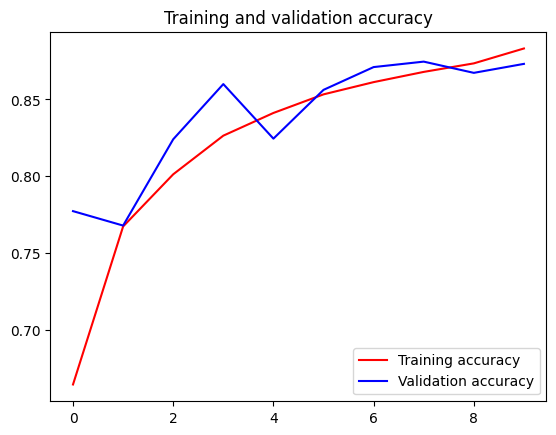

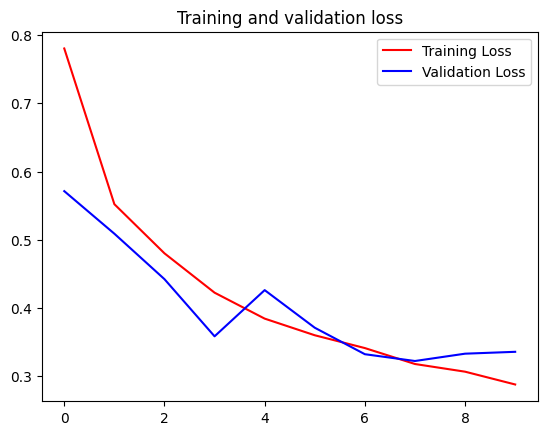

In [7]:
# Plot accuracy and loss curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

In [8]:
# load test data

test_ds = image_dataset_from_directory(
    '../exports/spectrogram_images/test',
    batch_size=32,
    image_size=(160, 160),
    shuffle=True,
)

test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))

Found 5950 files belonging to 4 classes.


In [9]:
# Evaluate model

test_loss, test_acc = model.evaluate(test_ds)
print('Test accuracy:', test_acc)

186/186 [==============================] - 76s 410ms/step - loss: 0.2844 - accuracy: 0.8790
Test accuracy: 0.8789916038513184


In [10]:
import numpy as np
y_true = []
y_pred = []

for x_batch, y_batch in test_ds:
    preds = model.predict(x_batch, verbose=0)
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

In [11]:

from sklearn.metrics import classification_report
class_names = ['healthy', 'inner_race', 'other_fault', 'outer_race']
# order alphabetically
class_names = sorted(class_names)
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     healthy       0.90      0.87      0.88      1492
  inner_race       0.86      0.88      0.87      1487
 other_fault       0.96      0.98      0.97      1487
  outer_race       0.80      0.79      0.79      1484

    accuracy                           0.88      5950
   macro avg       0.88      0.88      0.88      5950
weighted avg       0.88      0.88      0.88      5950



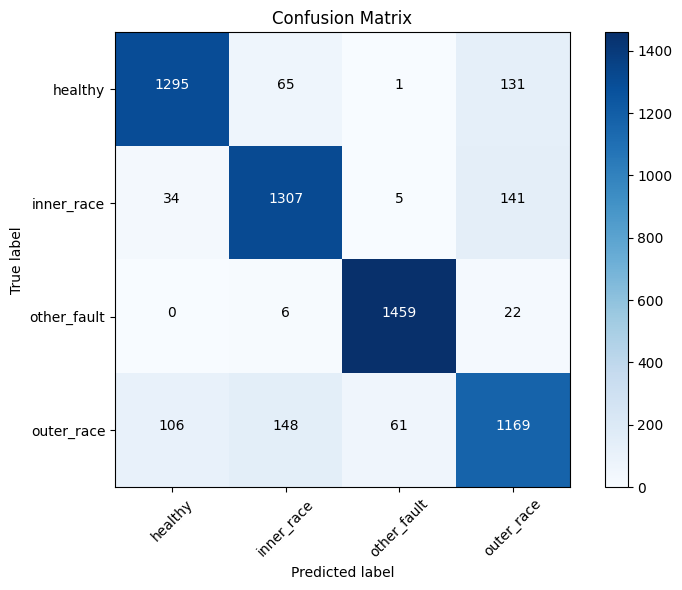

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add numbers inside the boxes
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

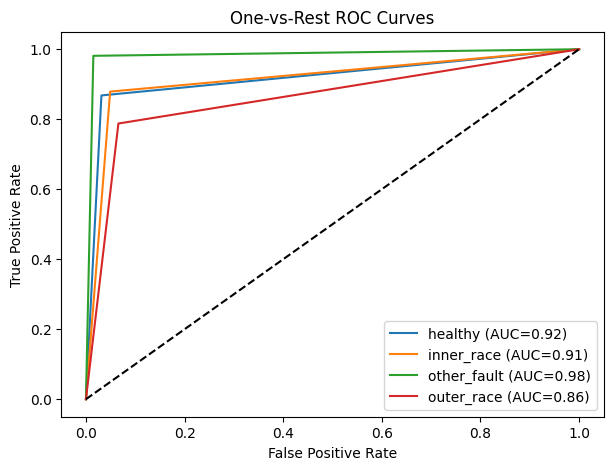

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = len(class_names)
y_test_bin = label_binarize(y_true, classes=np.arange(n_classes))
y_pred_bin = label_binarize(y_pred, classes=np.arange(n_classes))

plt.figure(figsize=(7,5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("One-vs-Rest ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


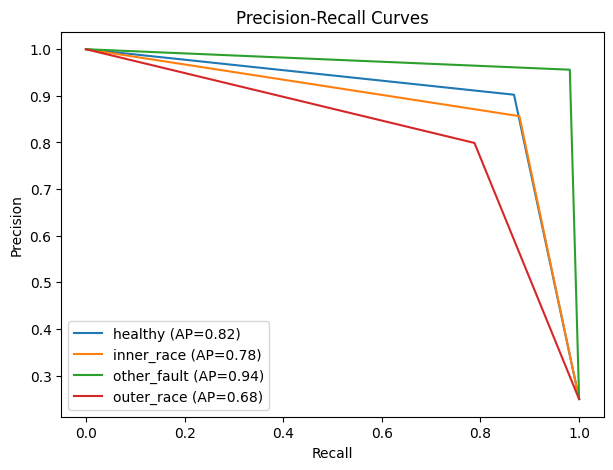

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, label=f"{class_names[i]} (AP={ap:.2f})")

plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
